In [ ]:
%matplotlib inline

In [ ]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sn
from sklearn.decomposition import PCA
from numpy import asarray
from numpy import save
from numpy import load
#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.set_option('precision', 5)
pd.set_option("display.max_columns",20)
pd.set_option('display.max_rows', 999)
#pd.set_option('max_colwidth', 6)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
from datetime import datetime
from random import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
fichier="/content/drive/MyDrive/projet_long/data_100_rearranged.csv"
df100 = pd.read_csv(fichier,sep=",")
df100.head()

,combined_station,total_chla_5.0,total_chla_13.92,total_chla_23.23,total_chla_38.75,total_chla_64.63,total_chla_107.81,total_chla_179.85,DVchla_5.0,DVchla_13.92,...,RRS443,RRS412,KD490,KDPAR,PAR,ZEU,ZHL,day,month,year
0,combined_station_1,0.30900,0.483,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,5,1991
1,combined_station_10,0.15600,0.157,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,5,1991
2,combined_station_100,0.09472,NaN,0.08560,0.24183,0.29462,0.02910,NaN,0.00648,NaN,...,NaN,NaN,NaN,NaN,34.83345,NaN,NaN,30,9,1999
3,combined_station_101,0.09657,NaN,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,NaN,...,0.00591,0.00582,0.04342,0.07659,34.12751,70.15463,26.1147,1,10,1999
4,combined_station_102,0.32600,0.342,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1994


In [ ]:
fichier="/content/drive/MyDrive/projet_long/data_50_rearranged.csv"
df50 = pd.read_csv(fichier,sep=",")
df50.head()

,combined_station,total_chla_5.0,total_chla_13.92,total_chla_23.23,total_chla_38.75,total_chla_64.63,total_chla_107.81,total_chla_179.85,DVchla_5.0,DVchla_13.92,...,RRS443,RRS412,KD490,KDPAR,PAR,ZEU,ZHL,day,month,year
0,combined_station_1,0.30900,0.483,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,5,1991
1,combined_station_10,0.15600,0.157,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,5,1991
2,combined_station_100,0.09472,NaN,0.08560,0.24183,0.29462,0.02910,NaN,0.00648,NaN,...,NaN,NaN,NaN,NaN,34.83345,NaN,NaN,30,9,1999
3,combined_station_101,0.09657,NaN,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,NaN,...,0.00591,0.00582,0.04342,0.07659,34.12751,70.15463,26.1147,1,10,1999
4,combined_station_102,0.32600,0.342,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1994


In [ ]:
df50.columns[44]

'lat_sat'

In [ ]:
n=40
s=0
L50=[]
L100=[]
while s<=n :
  i=randint(0,df50.shape[0]-1)
  j=randint(1,42)
  if pd.isna(df50.iloc[i,j])==False:
    L50.append((i,j))
    s+=1
    for k in range(df100.shape[0]):
      if df100.iloc[k,43]==df50.iloc[i,43] and df100.iloc[k,44]==df50.iloc[i,44] and df100.iloc[k,56]==df50.iloc[i,56] and df100.iloc[k,57]==df50.iloc[i,57] and df100.iloc[k,58]==df50.iloc[i,58]:
        L100.append((k,j))

In [ ]:
L50

[(297, 30),
 (68, 20),
 (564, 26),
 (715, 21),
 (226, 14),
 (326, 8),
 (158, 15),
 (420, 30),
 (75, 21),
 (563, 33),
 (388, 26),
 (392, 14),
 (455, 29),
 (688, 34),
 (428, 23),
 (398, 37),
 (273, 36),
 (485, 17),
 (223, 21),
 (451, 33),
 (663, 35),
 (354, 37),
 (173, 29),
 (240, 28),
 (116, 25),
 (52, 5),
 (672, 7),
 (3, 34),
 (613, 16),
 (704, 21),
 (477, 12),
 (101, 6),
 (66, 25),
 (80, 26),
 (76, 34),
 (137, 22),
 (96, 20),
 (96, 32),
 (292, 21),
 (384, 39),
 (587, 6)]

In [ ]:
type(L50)

list

In [ ]:
len(L100)==len(L50)

True

In [ ]:
for i in range(len(L50)):
  print(df50.iloc[L50[i][0],L50[i][1]],df100.iloc[L100[i][0],L100[i][1]])

0.0 0.0
0.022738574 0.022738574
0.0135 0.0135
0.019 0.019
0.021739363 0.021739363
0.2 0.2
0.03049869 0.03049869
0.019 0.019
0.00475 0.00475
0.0 0.0
0.103 0.103
0.0 0.0
0.0955 0.0955
0.66 0.66
0.017482566 0.017482566
0.444066667 0.444066667
0.0 0.0
0.027000000000000003 0.027000000000000003
0.18 0.18
0.08813333300000001 0.08813333300000001
0.0 0.0
0.0016 0.0016
0.003 0.003
0.008 0.008
0.0177 0.0177
0.053333333 0.053333333
0.023 0.023
0.0 0.0
0.0 0.0
0.0229 0.0229
0.0043 0.0043
0.052000000000000005 0.052000000000000005
0.045 0.045
0.0215 0.0215
0.03735 0.03735
0.81825 0.81825
0.0008222269999999999 0.0008222269999999999
0.54085203 0.54085203
0.0225 0.0225
0.108237684 0.108237684
0.006999999999999999 0.006999999999999999


In [ ]:
L50=np.array(L50)
save('/content/drive/MyDrive/projet_long/L50_3.npy',L50,allow_pickle=True)

In [ ]:
L100

[(27, 12),
 (193, 38),
 (115, 33),
 (7, 31),
 (215, 42),
 (754, 2),
 (211, 8),
 (48, 15),
 (571, 29),
 (306, 24),
 (109, 27),
 (74, 29),
 (38, 19),
 (762, 3),
 (218, 28),
 (461, 5),
 (434, 9),
 (778, 9),
 (53, 26),
 (429, 5),
 (39, 11),
 (613, 34),
 (44, 8),
 (309, 27),
 (663, 31),
 (464, 20),
 (726, 12),
 (59, 35),
 (637, 14),
 (467, 16),
 (387, 32),
 (705, 3),
 (74, 23),
 (398, 15),
 (330, 20),
 (444, 6),
 (139, 14),
 (223, 3),
 (787, 20),
 (138, 19),
 (81, 13)]

In [ ]:
for i in range(len(L50)):
  print(df50.iloc[L50[i][0],L50[i][1]]==df100.iloc[L100[i][0],L100[i][1]])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
len(L50)==len(L100)

True

In [ ]:
for (i,j) in L50:
   df50.iloc[i,j]=np.nan
for (i,j) in L100:
   df100.iloc[i,j]=np.nan

In [ ]:
for i in range(len(L50)):
  print(df50.iloc[L50[i][0],L50[i][1]],df100.iloc[L100[i][0],L100[i][1]])

nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


In [ ]:
df50.to_csv('data_50_troué_3.csv')
!cp data_50_troué_3.csv "drive/MyDrive/projet_long"
df100.to_csv('data_100_troué_3.csv')
!cp data_100_troué_3.csv "drive/MyDrive/projet_long"

NameError: ignored

In [ ]:
L50=load('/content/drive/MyDrive/projet_long/L50_3.npy').tolist()

In [ ]:
type(L50)

list

In [ ]:
fichier="/content/drive/MyDrive/projet_long/50COMPLETED_MED_3_400.csv"
dfCOMP_TEST = pd.read_csv(fichier,sep=";")
dfCOMP_TEST.head()

,total_chla_5_0,total_chla_13_92,total_chla_23_23,total_chla_38_75,total_chla_64_63,total_chla_107_81,total_chla_179_85,DVchla_5_0,DVchla_13_92,DVchla_23_23,...,perid_64_63,perid_107_81,perid_179_85,zeax_5_0,zeax_13_92,zeax_23_23,zeax_38_75,zeax_64_63,zeax_107_81,zeax_179_85
0,0.30900,0.48300,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.00000,0.00000,...,0.02400,0.0180,0.00000e+00,0.00300,0.00500,0.01100,0.01050,0.00700,0.01067,0.00000
1,0.15600,0.15700,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.00000,0.00000,...,0.02550,0.0040,0.00000e+00,0.03900,0.04900,0.02000,0.04750,0.02000,0.00367,0.00050
2,0.09472,0.08726,0.08560,0.24183,0.29462,0.02910,0.00596,0.00648,0.00199,0.00704,...,0.00189,0.0000,1.08420e-19,0.04304,0.04048,0.03877,0.05342,0.01934,0.00000,0.00000
3,0.09657,0.10213,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,0.00800,0.01680,...,0.00281,0.0000,0.00000e+00,0.04974,0.04048,0.05318,0.04783,0.02308,0.00000,0.00000
4,0.32600,0.34200,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.00000,0.00000,...,0.00150,0.0005,0.00000e+00,0.00569,0.00548,0.00561,0.00524,0.00459,0.00299,0.00313


In [ ]:
fichier="/content/drive/MyDrive/projet_long/data_50_rearranged.csv"
df50 = pd.read_csv(fichier,sep=",")
df50.head()

,combined_station,total_chla_5.0,total_chla_13.92,total_chla_23.23,total_chla_38.75,total_chla_64.63,total_chla_107.81,total_chla_179.85,DVchla_5.0,DVchla_13.92,...,RRS443,RRS412,KD490,KDPAR,PAR,ZEU,ZHL,day,month,year
0,combined_station_1,0.30900,0.483,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,5,1991
1,combined_station_10,0.15600,0.157,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,5,1991
2,combined_station_100,0.09472,NaN,0.08560,0.24183,0.29462,0.02910,NaN,0.00648,NaN,...,NaN,NaN,NaN,NaN,34.83345,NaN,NaN,30,9,1999
3,combined_station_101,0.09657,NaN,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,NaN,...,0.00591,0.00582,0.04342,0.07659,34.12751,70.15463,26.1147,1,10,1999
4,combined_station_102,0.32600,0.342,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1994


In [ ]:
L50

[[27, 12],
 [191, 38],
 [113, 33],
 [7, 31],
 [213, 42],
 [684, 2],
 [209, 8],
 [48, 15],
 [533, 29],
 [304, 24],
 [107, 27],
 [73, 29],
 [38, 19],
 [691, 3],
 [216, 28],
 [442, 5],
 [416, 9],
 [707, 9],
 [53, 26],
 [411, 5],
 [39, 11],
 [567, 34],
 [44, 8],
 [307, 27],
 [603, 31],
 [444, 20],
 [657, 12],
 [59, 35],
 [582, 14],
 [446, 16],
 [370, 32],
 [637, 3],
 [73, 23],
 [380, 15],
 [321, 20],
 [426, 6],
 [137, 14],
 [221, 3],
 [716, 20],
 [136, 19],
 [80, 13]]

In [ ]:
values_completed=[]
for i in range(len(L50)):
  values_completed.append(dfCOMP_TEST.iloc[L50[i][0],L50[i][1]-1])
  print(dfCOMP_TEST.iloc[L50[i][0],L50[i][1]-1])

-2.63640004432436e-06
0.0308866476666667
0.00777152775
0.019
0.0153440530277778
0.222129166666667
0.0239199865
0.0263138888888889
0.0040983155348689295
0.00662089833333333
0.123236111166667
0.0013275335
0.127625
0.5576522472505
0.0112460037919909
0.582088889
1.83800663795929e-05
0.024425
0.14300000000000002
0.19654074077777803
0.0
0.0024
0.0
0.016611111
0.01475
0.0458866666666667
0.0145
0.00129452241666667
7.37334067818333e-07
0.0340228350684558
0.00416066010015486
0.052000000000000005
0.03579962
0.0227222222222222
0.027435416749999997
0.9582816665999999
0.0
0.42232389837168893
0.1250125
0.04722732575
0.0201088349835613


In [ ]:
target_values=[]
for i in range(len(L50)):
  target_values.append(df50.iloc[L50[i][0],L50[i][1]])
  print(df50.iloc[L50[i][0],L50[i][1]])

0.0
0.022738574
0.0135
0.019
0.021739363
0.2
0.03049869
0.019
0.00475
0.0
0.103
0.0
0.0955
0.66
0.017482566
0.444066667
0.0
0.027000000000000003
0.18
0.08813333300000001
0.0
0.0016
0.003
0.008
0.0177
0.053333333
0.023
0.0
0.0
0.0229
0.0043
0.052000000000000005
0.045
0.0215
0.03735
0.81825
0.0008222269999999999
0.54085203
0.0225
0.108237684
0.006999999999999999


In [ ]:
for i in range(len(L50)):
  print((target_values[i],values_completed[i]))

(0.0, -2.63640004432436e-06)
(0.022738574, 0.0308866476666667)
(0.0135, 0.00777152775)
(0.019, 0.019)
(0.021739363, 0.0153440530277778)
(0.2, 0.222129166666667)
(0.03049869, 0.0239199865)
(0.019, 0.0263138888888889)
(0.00475, 0.0040983155348689295)
(0.0, 0.00662089833333333)
(0.103, 0.123236111166667)
(0.0, 0.0013275335)
(0.0955, 0.127625)
(0.66, 0.5576522472505)
(0.017482566, 0.0112460037919909)
(0.444066667, 0.582088889)
(0.0, 1.83800663795929e-05)
(0.027000000000000003, 0.024425)
(0.18, 0.14300000000000002)
(0.08813333300000001, 0.19654074077777803)
(0.0, 0.0)
(0.0016, 0.0024)
(0.003, 0.0)
(0.008, 0.016611111)
(0.0177, 0.01475)
(0.053333333, 0.0458866666666667)
(0.023, 0.0145)
(0.0, 0.00129452241666667)
(0.0, 7.37334067818333e-07)
(0.0229, 0.0340228350684558)
(0.0043, 0.00416066010015486)
(0.052000000000000005, 0.052000000000000005)
(0.045, 0.03579962)
(0.0215, 0.0227222222222222)
(0.03735, 0.027435416749999997)
(0.81825, 0.9582816665999999)
(0.0008222269999999999, 0.0)
(0.54085203,

In [ ]:
A=np.array([target_values,values_completed]).T

In [ ]:
A=pd.DataFrame(A)

In [ ]:
A

,0,1
0,0.00000,-2.63640e-06
1,0.02274,3.08866e-02
2,0.01350,7.77153e-03
3,0.01900,1.90000e-02
4,0.02174,1.53441e-02
5,0.20000,2.22129e-01
6,0.03050,2.39200e-02
7,0.01900,2.63139e-02
8,0.00475,4.09832e-03
9,0.00000,6.62090e-03


In [ ]:
A.corr()

,0,1
0,1.0000,0.9697
1,0.9697,1.0000


In [ ]:
L50_2=load('/content/drive/MyDrive/projet_long/L50_2.npy').tolist()

In [ ]:
type(L50)

list

In [ ]:
fichier="/content/drive/MyDrive/projet_long/50COMPLETED_MED_2_400.csv"
dfCOMP_TEST_2 = pd.read_csv(fichier,sep=";")
dfCOMP_TEST_2.head()

,total_chla_5_0,total_chla_13_92,total_chla_23_23,total_chla_38_75,total_chla_64_63,total_chla_107_81,total_chla_179_85,DVchla_5_0,DVchla_13_92,DVchla_23_23,...,perid_64_63,perid_107_81,perid_179_85,zeax_5_0,zeax_13_92,zeax_23_23,zeax_38_75,zeax_64_63,zeax_107_81,zeax_179_85
0,0.30900,0.48300,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.00000,0.00000,...,0.02400,0.0180,0.0,0.00300,0.00500,0.01100,0.01050,0.00700,0.01067,0.0000
1,0.15600,0.15700,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.00000,0.00000,...,0.02550,0.0040,0.0,0.03900,0.04900,0.02000,0.04750,0.02000,0.00367,0.0005
2,0.09472,0.06307,0.08560,0.24183,0.29462,0.02910,0.00899,0.00648,0.00635,0.00704,...,0.00189,0.0000,0.0,0.04304,0.02997,0.03877,0.05342,0.01934,0.00000,0.0000
3,0.09657,0.07584,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,0.00881,0.01680,...,0.00281,0.0000,0.0,0.04974,0.02997,0.05318,0.04783,0.02308,0.00000,0.0000
4,0.32600,0.34200,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.00000,0.00000,...,0.00150,0.0005,0.0,0.00690,0.00660,0.00675,0.00615,0.00485,0.00145,0.0021


In [ ]:
values_completed_2=[]
for i in range(len(L50_2)):
  values_completed_2.append(dfCOMP_TEST_2.iloc[L50_2[i][0],L50_2[i][1]-1])
  print(dfCOMP_TEST_2.iloc[L50_2[i][0],L50_2[i][1]-1])

0.0374555553333333
0.0201266712403284
0.00275
0.0449865005
0.0221166666666667
0.229654680831418
0.014575
0.4949333335
0.0116666666666667
0.333621406248098
-1.7347234759768098e-18
0.013930448
0.695075
0.0182342258213864
0.101933333333333
0.0925
0.0247894973333333
0.03055
0.131650551563547
0.00434189174212353
0.0285666666666667
0.56516
-1.7347234759768098e-18
-1.4933960384052798e-06
0.0279498656369308
0.1276726115
0.0015275673780150002
0.00244487160118348
0.00680502576294872
0.003649672375
0.43485
0.00229632166666667
0.0171977564444444
0.0006394143333333309
0.267148837317317
0.0
0.00231
0.2877875
0.0018342874652106898
0.00309070047709118
0.0


In [ ]:
target_values_2=[]
for i in range(len(L50_2)):
  target_values_2.append(df50.iloc[L50_2[i][0],L50_2[i][1]])
  print(df50.iloc[L50_2[i][0],L50_2[i][1]])

0.040466667000000005
0.02428406
0.0
0.05249079
0.012
0.2984
0.011
1.197
0.014
0.366
0.0
0.0075
1.0385
0.0166
0.0981
0.085
0.0233
0.037000000000000005
0.0235
0.0021
0.048
0.5504
0.0
0.0
0.0
0.0445
0.0
0.0
0.0106
0.006453986
0.6669
0.026
0.023666667
0.0023373770000000003
0.2905
0.0
0.0
0.3127
0.0
0.0065
0.0


In [ ]:
L50_1=load('/content/drive/MyDrive/projet_long/L50_1.npy').tolist()

In [ ]:
fichier="/content/drive/MyDrive/projet_long/50COMPLETED_MED_1_400.csv"
dfCOMP_TEST_1 = pd.read_csv(fichier,sep=";")
dfCOMP_TEST_1.head()

,total_chla_5_0,total_chla_13_92,total_chla_23_23,total_chla_38_75,total_chla_64_63,total_chla_107_81,total_chla_179_85,DVchla_5_0,DVchla_13_92,DVchla_23_23,...,perid_64_63,perid_107_81,perid_179_85,zeax_5_0,zeax_13_92,zeax_23_23,zeax_38_75,zeax_64_63,zeax_107_81,zeax_179_85
0,0.30900,0.48300,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.00000,0.00000,...,0.02400,0.01800,0.00000,0.00300,0.00500,0.01100,0.01050,0.00700,0.01067,0.00000
1,0.15600,0.15700,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.00000,0.00000,...,0.02550,0.00400,0.00000,0.03900,0.04900,0.02000,0.04750,0.02000,0.00367,0.00050
2,0.09472,0.08156,0.08560,0.24183,0.29462,0.02910,0.03470,0.00648,0.00294,0.00704,...,0.00189,0.00000,0.00035,0.04304,0.02944,0.03877,0.05342,0.01934,0.00000,0.00081
3,0.09657,0.14567,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,0.00281,0.01680,...,0.00281,0.00087,0.00000,0.04974,0.04433,0.05318,0.04783,0.02308,0.00000,0.00000
4,0.32600,0.34200,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.00000,0.00000,...,0.00150,0.00050,0.00000,0.00530,0.00506,0.00484,0.00470,0.00442,0.00368,0.00295


In [ ]:
values_completed_1=[]
for i in range(len(L50_1)):
  values_completed_1.append(dfCOMP_TEST_1.iloc[L50_1[i][0],L50_1[i][1]-1])
  print(dfCOMP_TEST_1.iloc[L50_1[i][0],L50_1[i][1]-1])

0.017
0.0230555555555556
0.2173333335
0.0101806155833333
0.0200145709898799
0.000990000000000001
0.0153704957916667
0.004225
0.0009120370370370381
0.0292577091163748
0.17803541675
0.0
0.0212875
0.0015223548645769901
0.00542
0.0204794251423958
0.040953949875
0.13080625
0.0101806155833333
0.00642
0.000666666666666667
0.039175
0.0
0.0104695341666667
0.00533333333333334
0.1590533334
0.0993535976666667
0.0008717709646477059
0.0253
0.0025833333333333303
0.0
0.0166539531684569
0.0376062191966603
0.0088
0.00133125
0.004975
0.0774576191370544
0.009243878378329191
0.00530114172782545
0.0475375
0.262041364


In [ ]:
target_values_1=[]
for i in range(len(L50_1)):
  target_values_1.append(df50.iloc[L50_1[i][0],L50_1[i][1]])
  print(df50.iloc[L50_1[i][0],L50_1[i][1]])

0.0
0.023
0.13699999999999998
0.006666666999999999
0.013607535
0.0
0.017071611
0.0051
0.0
0.024866667
0.2412
0.0
0.0401
0.0
0.0057
0.0052
0.0433330555
0.2117
0.016417225
0.004133333
0.0
0.0494
0.0
0.010184722
0.004
0.2165
0.132
0.0
0.0734
0.0005
0.0
0.014
0.03
0.004
0.001
0.00715212
0.054333333
0.006999999999999999
0.004
0.0444
0.256166667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


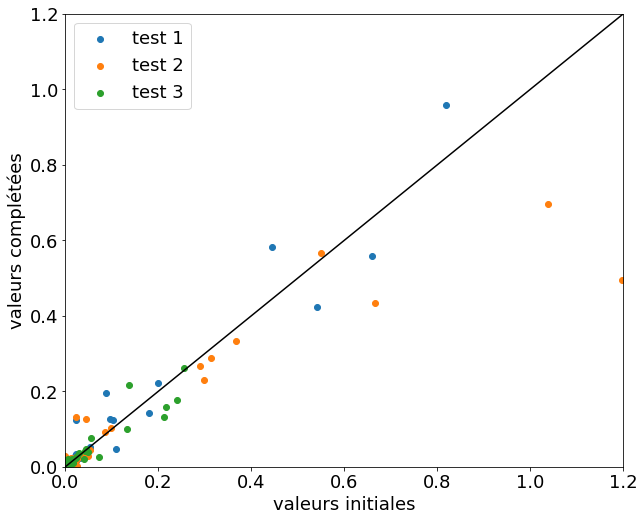

In [ ]:
plt.figure(figsize=(10,10*1/1.2))
plt.scatter(target_values,values_completed,label='test 1')
plt.scatter(target_values_2,values_completed_2,label='test 2')
plt.scatter(target_values_1,values_completed_1,label='test 3')
ax=plt.subplot(111)
ax.plot([0,1],[0,1], transform=ax.transAxes,c='black')
plt.xlabel('valeurs initiales')
plt.ylabel('valeurs complétées')
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.legend();

In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.concatenate([target_values,target_values_2,target_values_1]), np.concatenate([values_completed,values_completed_2,values_completed_1]))

In [ ]:
r_value

0.9202914083611523

In [ ]:
r_value_1

NameError: ignored

In [ ]:
r_value_2